In [1]:
import h5py
import pandas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
import pandas as pd
import graphviz
from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from ipywidgets import interactive
from IPython.display import display
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
from lightgbm import early_stopping
from functions import *
import time

def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pandas.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu',
                 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0',
                 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster',
                 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2',
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
                 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',
                 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG',
                 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3',
                 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core',
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG',
                 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset',
                 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection',
                 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1',
                 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3',
                 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X = train[all_variables]
y = train['Truth']


print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
Shape of X: (162500, 160)
Shape of y: (162500,)


In [2]:
# # 6x6 plot of the variable distributions (diagonal) and their mutual correlations (off-diagonal):

# amount_to_drop = 0

# index_dropping = np.arange(start = 0, stop = amount_to_drop, step = 1, dtype = 'int')



# X_trimmed = train.get(['p_numberOfPixelHits','correctedActualMu','Truth','p_charge', 'p_rawECluster', 'p_eClusterLr0',
#                        'p_eClusterLr1', 'p_eClusterLr3', 'p_ehad1',
#                    'p_DeltaE', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
#                  'p_R12', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_deltaEta1',
#                  'p_TRTPID', 'p_numberOfInnermostPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',]);       # Trim dataframe to have relevant variables

# X_trimmed = X_trimmed.drop(index_dropping)


# import seaborn as sns
# #sns.pairplot(X_trimmed, hue='Truth', diag_kind='hist')

## Setting up the correlation functions:

In [3]:

# # First print the correlations for ALL events:
# #print(X_trimmed.corr(method='pearson'))

# # Divide data into b-jets and non-b-jets:
# df_electron = X_trimmed.loc[X_trimmed['Truth'] == 1].drop(['Truth'], axis=1);
# df_non_electron = X_trimmed.loc[X_trimmed['Truth'] == 0].drop(['Truth'], axis=1);

# plot_corr = False

# if plot_corr:
#     # Make two separate correlation plots, also to see differences:
#     fig, ax = plt.subplots(1, 2, figsize=(18, 8))
#     sns.heatmap(df_electron.corr(), mask=np.zeros_like(df_electron.corr(), dtype=bool),
#                 cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0,
#                 square=True, ax=ax[0])
#     ax[0].set_title('Electrons');

#     sns.heatmap(df_non_electron.corr(), mask=np.zeros_like(df_non_electron.corr(), dtype=bool),
#                 cmap=sns.diverging_palette(220, 10, as_cmap=True), vmin=-1.0, vmax=1.0,
#                 square=True, ax=ax[1])
#     ax[1].set_title('Non-electrons');

## Decision Tree

In [4]:
# def plot_tree(depth, Nmin):
#     tree_clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=Nmin)
#     tree_clf.fit(X, y)
#     graph = Source(tree.export_graphviz(tree_clf, out_file=None, filled = True))
#     display(SVG(graph.pipe(format='svg')))
#     return tree_clf

In [5]:
# tree_clf = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)

# y_trimmed = X_trimmed['Truth']

# predicted_truth = tree_clf.fit(X_trimmed, y_trimmed).predict(X_trimmed)

# N, accuracy, fracWrong = confusion_matrix(predicted_truth, y_trimmed.to_numpy())
# print("\nDecision Tree BJET TAG:")
# print("  First number in parenthesis is the estimate, second is the MC truth:")
# print("  True-Negative (0,0)  = ", N[0][0])
# print("  False-Negative (0,1) = ", N[0][1])
# print("  False-Positive (1,0) = ", N[1][0])
# print("  True-Positive (1,1)  = ", N[1][1])
# print("    Fraction wrong            = ( (0,1) + (1,0) ) / sum = ", fracWrong)
# print("    Fraction right (accuracy) = ( (0,0) + (1,1) ) / sum = ", accuracy)

## Setting up LightGBM

In [6]:

start=time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train, input_test, truth_train, truth_test = train_test_split(X, y, test_size=0.25, random_state=42)
lgb_train = lgb.Dataset(input_train, truth_train)
lgb_eval  = lgb.Dataset(input_test,  truth_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'binary',   # The outcome is binary, b-quark or not
    'num_leaves': 6,         # Set a maximum tree leaves to avoid overfitting
    'verbose':-1,            # Suppress some output
}

# Train the model:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score = gbm.predict(input_test, num_iteration=gbm.best_iteration)  # Scores are floats in the range ]0,1[.
y_pred  = [1 if pred > 0.1 else 0 for pred in y_score]               # Classify b-quark yes or no (for comparison). 

# Print the time usage:
end = time.time()
print(f"Time used by LightGBM: {(end-start):.1f} ms")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[748]	valid_0's binary_logloss: 0.145286
Time used by LightGBM: 14.5 ms


## Setting up the feature importance, so that we can choose the 15 best parameters

In [7]:
important_features = gbm.feature_importance()

important_features_index = np.argpartition(important_features, -15)[-15:]

gbm_trimmed_variables = np.asarray(all_variables)[important_features_index]

X_gbm_trimmed = X[gbm_trimmed_variables]

#lgb.plot_importance(gbm, grid = True, title = "Feature importance", xlabel = "Feature Importance score", ylabel = "Features", figsize = (20, 35))

## Setting up the optimised boosted decision tree, with the 15 parameters

In [8]:
start_1 = time.time()

# Split data set into training and test set and feed these to LightGBM:
# We choose a 75:25 division here. Dataset is shuffeled before the split. 
# By using a number (42), it creates a random seed so you can rerun and obtain the same result.
input_train_opt, input_test_opt, truth_train_opt, truth_test_opt = train_test_split(X_gbm_trimmed, y, test_size=0.25, random_state=42)
lgb_train_opt = lgb.Dataset(input_train_opt, truth_train_opt)
lgb_eval_opt  = lgb.Dataset(input_test_opt,  truth_test_opt, reference=lgb_train_opt)
params_opt = {
    'boosting_type': 'gbdt', # Traditional Gradient Boosting tree, we are combining many 'weak' learners here!
    'objective': 'binary',   # The outcome is binary, electron or not
    'num_leaves': 6,         # Set a maximum tree leaves to avoid overfitting
    'verbose':-1,            # Suppress some output
}

# Train the model:
gbm_opt = lgb.train(params_opt,
                lgb_train_opt,
                num_boost_round=1000,
                valid_sets=lgb_eval_opt,
                callbacks=[early_stopping(20)])     # Stops if no improvement is seen in N rounds.

# Make predictions:
y_score_opt = gbm_opt.predict(input_test_opt, num_iteration=gbm.best_iteration)  # Scores are floats in the range ]0,1[.
y_pred_opt  = [1 if pred > 0.1 else 0 for pred in y_score_opt]               # Classify b-quark yes or no (for comparison). 

# Print the time usage:
end_1 = time.time()
print(f"Time used by LightGBM: {(end_1-start_1):.1f} ms")

Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[778]	valid_0's binary_logloss: 0.152994
Time used by LightGBM: 3.0 ms


## Set up ROC curves for this model:

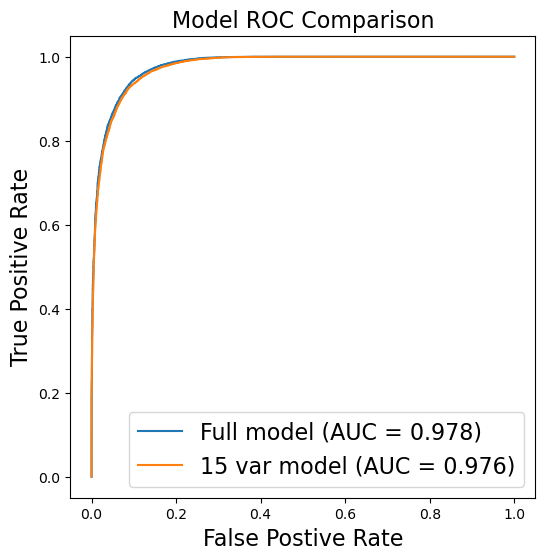

In [9]:
fpr, tpr, _ = roc_curve(truth_test, y_score)                  # False/True Positive Rate for our model
fpr_opt, tpr_opt, _ = roc_curve(truth_test, y_score_opt)                  # False/True Positive Rate for our model

# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr, tpr)                        # This is the AUC score for our model
auc_score_opt = auc(fpr_opt, tpr_opt)                        # This is the AUC score for our model


# Let's plot the ROC curves for these results:
fig = plt.figure(figsize = [6,6])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'Full model (AUC = {auc_score:5.3f})')
plt.plot(fpr_opt, tpr_opt, label=f'15 var model (AUC = {auc_score_opt:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)
plt.show()